                         
q_0: ──■────■────────────
       │    │            
q_1: ──┼────┼────■────■──
     ┌─┴─┐  │  ┌─┴─┐  │  
q_2: ┤ X ├──┼──┤ X ├──┼──
     └───┘┌─┴─┐└───┘┌─┴─┐
q_3: ─────┤ X ├─────┤ X ├
          └───┘     └───┘
     ┌───┐┌──────────────┐┌───┐┌─┐   
q_0: ┤ H ├┤0             ├┤ H ├┤M├───
     ├───┤│              │├───┤└╥┘┌─┐
q_1: ┤ H ├┤1             ├┤ H ├─╫─┤M├
     └───┘│  circuit-252 │└───┘ ║ └╥┘
q_2: ─────┤2             ├──────╫──╫─
          │              │      ║  ║ 
q_3: ─────┤3             ├──────╫──╫─
          └──────────────┘      ║  ║ 
c: 2/═══════════════════════════╩══╩═
                                0  1 
Counts: {'11': 53, '00': 47}


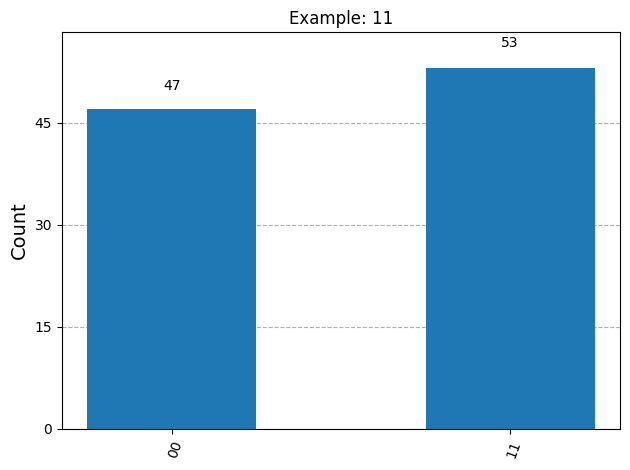

In [23]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Simon's algorithm circuit
def simon_algorithm(oracle):
    qc = QuantumCircuit(n + m, n)
    qc.h(list(range(n))) # Apply Hadamard gates to first n qubits
    qc.append(oracle, range(n + m))  # Apply oracle
    qc.h(list(range(n))) # Apply Hadamard gates to first n qubits
    qc.measure(range(n), range(n))
    return qc

def b_matrix_generator(case: str):
    if case == "10":
        return [[0,1],[0,1]]
    elif case == "01":
        return [[1,0],[1,0]]
    elif case == "11":
        return [[1,1],[1,1]]
    else:
        raise ValueError("Only supports secrets s=10, s=01, s=11 in 2x2 case.")


# Simon's oracle generator
def simon_oracle(s: str):
    qc = QuantumCircuit(n + m)

    b_matrix = b_matrix_generator(s)

    for i in range(n):
        for j in range(m):
            if b_matrix[i][j] == 1:
                qc.cx(i, n + j)
    return qc

# Example usage
n = 2
m = 2
case = "11"

oracle = simon_oracle(case)
qc = simon_algorithm(oracle)
print(oracle.draw("text"))
print(qc.draw("text"))

# Run on simulator
sim = Aer.get_backend("aer_simulator")
tqc = transpile(qc, sim)
result = sim.run(tqc, shots = 100).result()
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts, title="Example: "+ case)